<a href="https://colab.research.google.com/github/rpenal/Algoritmos2022-I/blob/main/LAB6/Lab_6_grupo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron simple




In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import random
from google.colab import files
pd.set_option('display.max_columns', 500)

# Definición de la clase perceptron 



In [149]:
class Perceptron:
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = float(eta)
        self.n_iter = n_iter

    def train(self, X, y):
        # inicializar los pesos en 0
        self.w = np.zeros(X.iloc[1, :].size+1)
        #vector de errores acumulados
        self.errors = []
        #ciclo de entrenamiento

        for i in range(self.n_iter):
            errors = 0
            for x_i, target in zip(X.index,y):
                #calcular el nuevo valor de los pesos
                delta_w = np.array((target - self.predict(X.loc[[x_i]])) * self.eta)
                #actualizar el valor de los pesos
                self.w[1:] += (delta_w * X.loc[[x_i]]).transpose()[x_i]
                #actualizar el valor del bias
                self.w[0] += delta_w
                if (delta_w!=0):
                    errors += 1
            self.errors.append(errors)
 

    def predict(self, X):
        #combinacion lineal, w[0] = bias
        v = np.dot(X, self.w [1:].astype("float64")) + self.w[0].astype("float64")
        #funcion de activación 
        if v > 0.0:
            return 1
        return 0

In [3]:
#cargar los archivos de los dataset
from sklearn.datasets import load_breast_cancer
df =load_breast_cancer(as_frame=True)
data = pd.DataFrame(df.frame)

# Leer el datset iris

El dataset iris es uno de los dataset mas utilizados para practicar  machine learning, el dataset incluye datos sobre 3 diferentes especies de flores, se incluyen solo los datos correspondientes a 2 especies de flores ya que el perceptron solo puede clasificar en dos grupos, los datos incluyen:

Sepal length in cm.  
Sepal width in cm.  
Petal length in cm.  
Petal width in cm.  
Class (Iris Setosa, Iris Versicolour, Iris Virginica).

El dataset esta disponible en http://archive.ics.uci.edu/ml/datasets/Iris


In [50]:
fortyper = int(len(data.index) * .4)
fiftyper = int(len(data.index) * .5)
ninetyper = int(len(data.index) * .9)
data2 = data.drop(['target'], axis=1)
data2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Selección de datos

In [114]:
datapractice = pd.concat([data2[:fortyper],data2[fiftyper:ninetyper]])
resultspractice = pd.concat([data["target"][:fortyper],data["target"][fiftyper:ninetyper]])

# Entrenamiento del perceptron

Se toma el 80% del dataset para entrenar el perceptron.



In [150]:
#tomar el 80 % del dataset para el entrenamiento
X_training = datapractice
y_training = resultspractice
#entrenar el perceptron
perceptron = Perceptron(2,n_iter=30)
perceptron.train(X_training, y_training)

plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Número de actualizaciones')

plt.tight_layout()
plt.show()

ValueError: ignored

In [61]:
print(X_training.shape)

(455, 30)


In [60]:
print(perceptron.w)
print(len(perceptron.w))

[ 4.00000000e+01 -4.08590726e+02 -1.75602064e+02 -1.33701682e+02
  4.55601440e+01 -2.74436290e+02 -9.95552400e+00 -1.20536538e+02
  3.69764160e+01  7.13524820e+01  2.54635840e+02  7.65895160e+01
 -6.99342080e+01 -1.13940880e+02  1.80620960e+01  6.54092740e+01
  8.89945880e+01  3.47604100e+01 -3.31164400e+00 -1.97138754e+02
 -5.69717800e+01 -2.90624100e+01  1.22331640e+01 -1.58617828e+02
 -1.05074954e+02 -1.44381862e+02 -2.14686808e+02  4.72067980e+01
 -7.45201140e+01 -1.74723140e+01 -1.76282024e+02 -7.05717600e+01
 -2.04657940e+01  8.07293200e+00 -1.01556272e+02 -5.12470940e+01
 -3.49772900e+01  1.34403960e+01  5.16945860e+01  4.91137520e+01
 -4.58834000e-01  9.49014280e+01  2.02040800e+02 -1.66719372e+02
  2.57883060e+01  7.71380000e+01 -1.94815870e+02  1.24870896e+02
  5.60325740e+01 -2.22122400e+00  1.23844468e+02  9.55235820e+01
  1.19076180e+01  3.20704700e+01 -1.02303472e+02  6.28540620e+01
  5.44924280e+01 -1.56563736e+02  5.68415440e+01  2.59238400e+01
  2.68490640e+01  2.31917

# Prueba del perceptron
Se toma el 20% restante del dataset para probar el perceptron

In [137]:
#Tomar el 20% restante del dataset para probar el perceptron
X_test = pd.concat([data2[fortyper+1:fiftyper],data2[ninetyper+1:]],axis=0)
y_test = pd.concat([data["target"][fortyper+1:fiftyper],data["target"][ninetyper+1:]])

#calcular los errores en la clasificacion 
error = 0
for i in range(0,len(X_test.iloc[1,:])):
    if perceptron.predict(X_test.iloc[i, :]) != y_test.iloc[i]:
        error += 1 
error = error / len(X_test.iloc[1,:]) * 100
print("error = {}%".format(error))

error = 0.0%


El perceptron simple presentó un 100% de exactitud.



# Dataset no separable linealmente

El dataset seeds contiene información de la clasificación de la especies de plantas de trigo según información sobre sus semillas, el dataset contiene los siguientes datos.

Area.  
Perimeter.  
Compactness.  
Length of kernel.  
Width of kernel.  
Asymmetry coefficient.  
Length of kernel groove. 
Class (1, 2, 3).

Como en el caso anterior se tienen tres clases, por lo tanto se utiliza los datos correspondientes a las dos primeras clases.
el dataset está disponible en http://archive.ics.uci.edu/ml/datasets/seeds




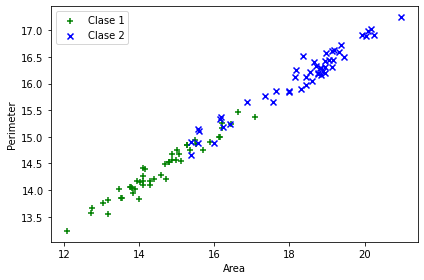

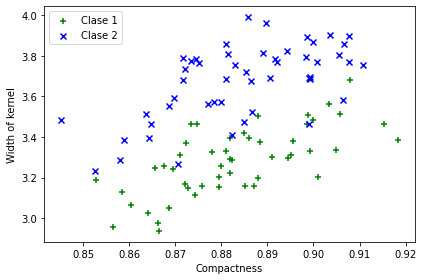

In [ ]:
f = open("seeds_dataset.txt", "r") 
seeds_df = []
y_seeds = []
#leer los datos correspondientes a las dos primeras clases
for i in range (0, 140):
    current = f.readline().split()
    if current[7]=="2":
      y_seeds.append(-1)
    else:
      y_seeds.append(1)
    seeds_df.append(current)
seeds_df = np.array(seeds_df,float)

#grafica Area vs Perimeter clase 1 y clase 2
plt.scatter(seeds_df[:50, 0], seeds_df[:50, 1], color='green', marker='+', label='Clase 1')
plt.scatter(seeds_df[-50:, 0], seeds_df[-50:, 1], color='blue', marker='x', label='Clase 2')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#grafica Compactness vs Width of kernel clase 1 y clase 2
plt.scatter(seeds_df[:50, 2], seeds_df[:50, 4], color='green', marker='+', label='Clase 1')
plt.scatter(seeds_df[-50:, 2], seeds_df[-50:, 4], color='blue', marker='x', label='Clase 2')
plt.xlabel('Compactness')
plt.ylabel('Width of kernel')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
perceptron_seeds = Perceptron(0.1,100)
X_seeds = seeds_df[0:, [2, 4]]
perceptron_seeds.train(X_seeds, y_seeds)
error = 0
for i in range(0,len(X_seeds)):
    if perceptron_seeds.predict(X_seeds[i]) != y_seeds[i]:
        error += 1 
error = error / len(X_seeds) * 100
print("error = {}%".format(error))

error = 50.0%


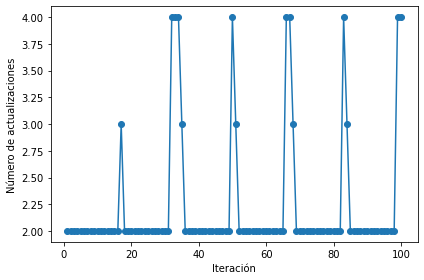

In [ ]:
plt.plot(range(1, len(perceptron_seeds.errors) + 1), perceptron_seeds.errors, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Número de actualizaciones')

plt.tight_layout()
plt.show()

# Referencias

https://www.llipe.com/2017/04/19/programando-un-clasificador-perceptron-en-python/
https://machinelearningmastery.com/standard-machine-learning-datasets/

